<a href="https://colab.research.google.com/github/aniruddhha/100-days-of-ml/blob/main/09_10_11_day_tf_fashion_mnist_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🔥 **Multiclass Class Classification, working with realtime example🔥**


# ✅ Loading the data

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#✅ Analysing the data

In [3]:
print(f'Training Sample {train_data[0]}')
print(f'Training Label {train_labels[0]}')

Training Sample [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [4]:
# shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

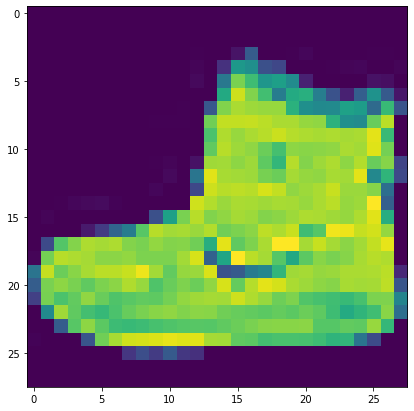

In [5]:
plt.figure(figsize=(10, 7))
plt.imshow(train_data[0])

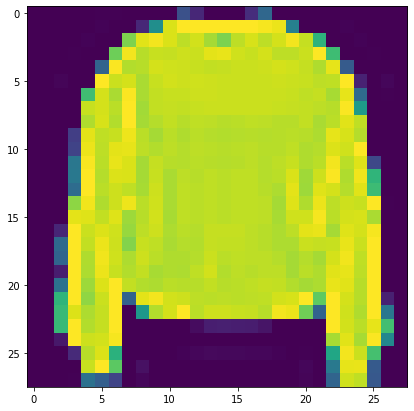

In [6]:
plt.figure(figsize=(10, 7))
plt.imshow(train_data[7])

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

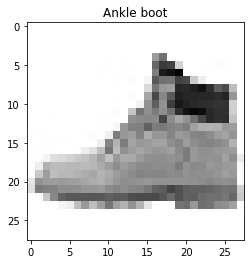

In [8]:
# plot example image and its label
index = 90
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

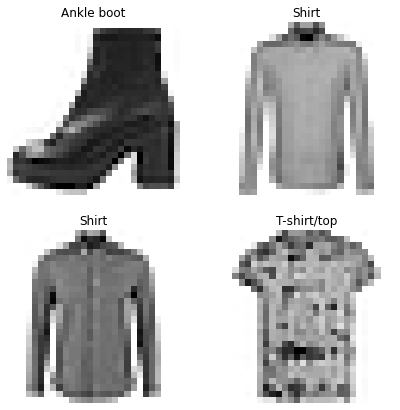

In [9]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize = (7, 7))

for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rnd_ind = random.choice(range(len(train_data)))
  plt.imshow(train_data[rnd_ind], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rnd_ind]])
  plt.axis(False)

#✅ Building Multi Class Classification Model

In [10]:
# what is flatteing ?
flt_mdl = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
])

flt_mdl.output_shape

(None, 784)

In [11]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

non_norm_history = model_1.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels)
                               )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

#✅ Improving Performance by normalising

In [12]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
# scaling data i.e. converting data to 0s and 1s

train_data.min(), train_data.max()

(0, 255)

In [14]:
# divide complete tensor by max

train_norm_data = train_data / 255.0
test_norm_data = test_data / 255.0

train_norm_data.min(), train_norm_data.max()

(0.0, 1.0)

In [15]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

norm_history = model_2.fit(train_norm_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_norm_data, test_labels)
                               )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

#✅ Plotting Loss Curves for Normalised and Non normalised data

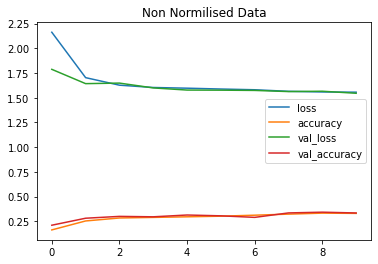

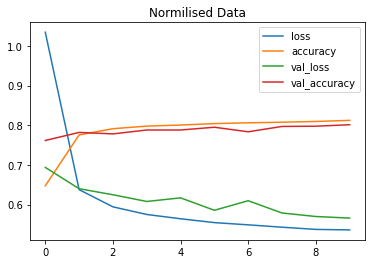

In [16]:
pd.DataFrame(non_norm_history.history).plot(title='Non Normilised Data')
pd.DataFrame(norm_history.history).plot(title='Normilised Data')

#✅ Finding the ideal learning rate

In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

cb = tf.keras.callbacks.LearningRateScheduler(lambda ep : 1e-3 * (10**(ep/20)))

idl_norm_history = model_3.fit(train_norm_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_norm_data, test_labels),
                               callbacks = [cb])


Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

In [18]:
lrs = 1e-3 * (10**tf.range(40)/20)

lrs.shape, tf.constant(idl_norm_history.history['loss']).shape
lrs

np.array(idl_norm_history.history['loss']).shape, lrs.numpy().shape
lrs.numpy().ndim, np.array(idl_norm_history.history['loss']).ndim
lrs,tf.constant(idl_norm_history.history['loss'], dtype=tf.float64)


(<tf.Tensor: shape=(40,), dtype=float64, numpy=
 array([ 5.00000000e-05,  5.00000000e-04,  5.00000000e-03,  5.00000000e-02,
         5.00000000e-01,  5.00000000e+00,  5.00000000e+01,  5.00000000e+02,
         5.00000000e+03,  5.00000000e+04,  7.05032704e+04,  6.07876096e+04,
        -3.63689984e+04,  6.58067456e+04,  1.38223616e+04, -7.65247488e+04,
         9.37459712e+04,  7.84662528e+04, -7.43309312e+04, -9.90642176e+04,
         8.30996480e+04, -2.79969792e+04, -6.52214272e+04, -7.96917760e+03,
        -7.96917760e+04,  6.20756992e+04, -2.34881024e+04, -2.01326592e+04,
         1.34217728e+04, -8.05306368e+04,  5.36870912e+04, -1.07374182e+05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])>,
 <tf.Tensor: shape=(40,), dtype=float64, numpy=
 array([1.03478396, 0.63657677, 0.59337866, 0.57493889, 0.56547928,
        0.55694807, 0.55424374, 0.55088615, 0.54679865, 0.54782337,
     

Text(0.5, 1.0, 'Ideal Learning Rate')

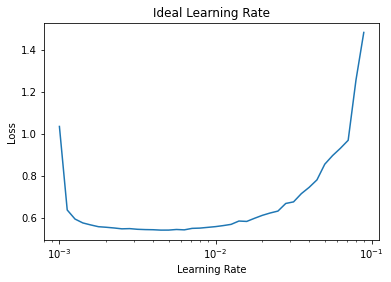

In [19]:
# plot learning rate decay curve
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, idl_norm_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Ideal Learning Rate')

In [20]:
# it seems ideal learning rate 0.001, lets train the model

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

cb = tf.keras.callbacks.LearningRateScheduler(lambda ep : 1e-3 * (10**(ep/20)))

idl_norm_history_1 = model_4.fit(train_norm_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_norm_data, test_labels),
                               callbacks = [cb])


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 3s

#✅ Applying Few More Evaluation Metrics

In [21]:
A = tf.constant([[2, 100, 20, 3, 600]])
tf.math.argmax(A, axis=1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([4])>

In [22]:
import itertools

from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_preds, classes=None):
  

# plot confusion matrix

  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=(20, 20))

  # plot Matrix with colors
  cax = ax.matshow(cm, cmap=plt.cm.Blues)

  # show ride side bar
  fig.colorbar(cax)

  if classes :
    labels = classes
  else :
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set X axis label
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust Label Sizes
  ax.yaxis.label.set_size(10)
  ax.xaxis.label.set_size(10)
  ax.title.set_size(10)

  # set the threshold for different colors
  # it will give different shades to cells
  threshold = (cm.max() + cm.min()) / 2

  # show text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
            j, i, 
            f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
            horizontalalignment ='center',
            color='white' if cm[i, j] > threshold else 'black',
            size = 15
  )

In [23]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
# make some predictions
y_probs = model_4.predict(test_norm_data)
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

313/313 [==============================] - 0s 1ms/step


(array([4.6023069e-10, 2.7991880e-13, 2.8396058e-05, 2.1801205e-07,
        7.7710989e-05, 1.3934940e-01, 2.4351149e-07, 9.2656851e-02,
        4.2974837e-03, 7.6358956e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [25]:
y_preds = y_probs.argmax(axis = 1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels, y_pred = y_preds)


array([[775,  14,  25,  62,  10,   2, 105,   0,   7,   0],
       [  4, 947,   2,  26,   8,   0,  13,   0,   0,   0],
       [ 33,   2, 628,   5, 228,   0,  97,   0,   7,   0],
       [ 65,  23,  14, 781,  70,   0,  42,   1,   4,   0],
       [  1,   1,  74,  22, 831,   0,  65,   0,   4,   2],
       [  0,   0,   0,   0,   0, 901,   0,  56,   5,  38],
       [167,   8, 161,  44, 214,   2, 391,   0,  13,   0],
       [  0,   0,   0,   0,   0,  31,   0, 923,   0,  46],
       [  5,   1,  52,  21,  22,  11,   9,   6, 869,   4],
       [  0,   0,   1,   0,   3,  22,   0,  45,   1, 928]])

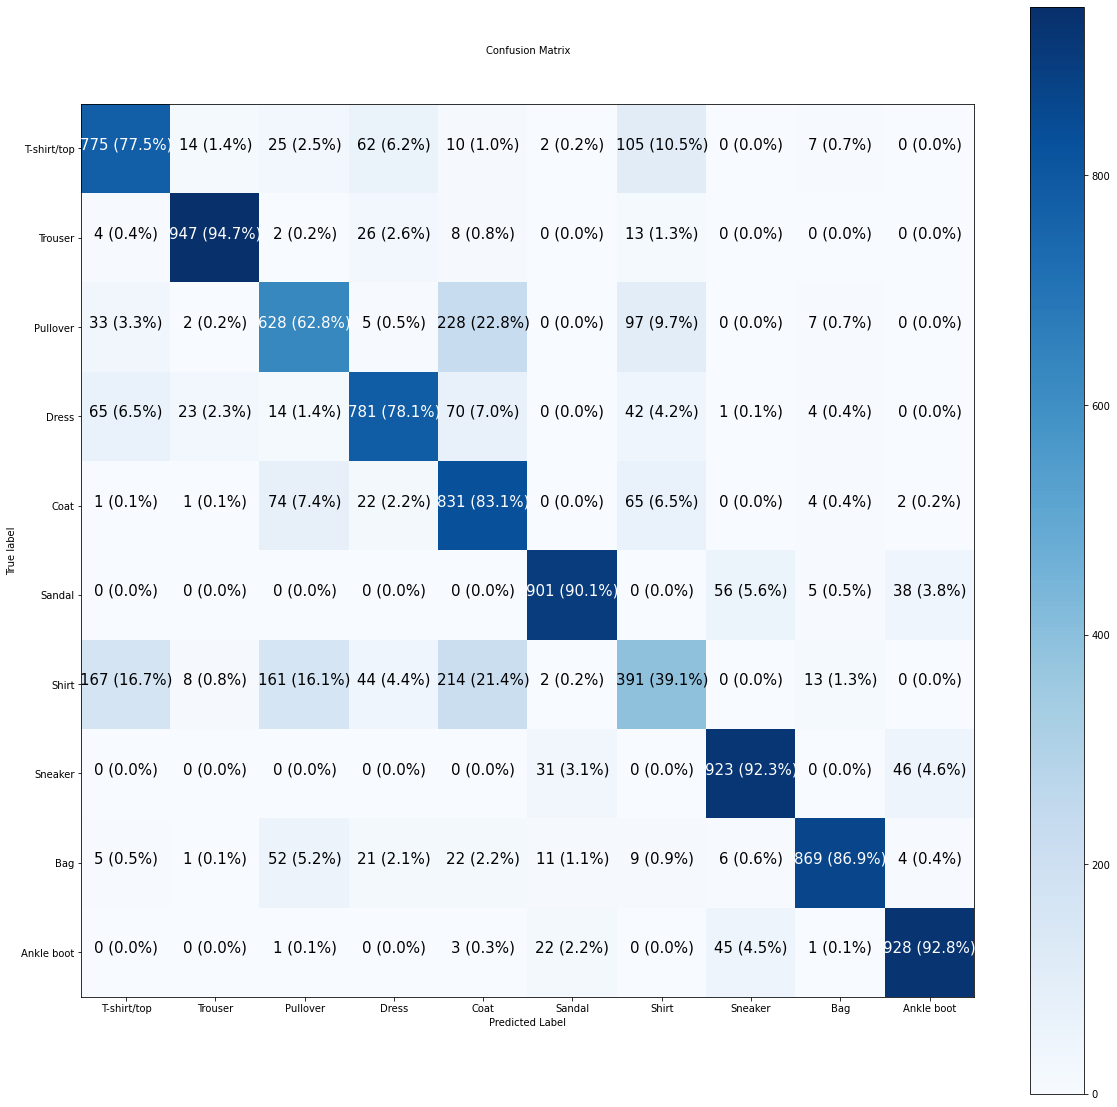

In [27]:
make_confusion_matrix(y_true = test_labels,
                      y_preds=y_preds,
                      classes = class_names)

#✅ Visualizing the predictions

In [28]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
    
  plt.xlabel(
      'Pred {} {:2.0f}% (True :{})'.format(pred_label, 100*tf.reduce_max(pred_probs), true_label),
      color = color
  )


1/1 [==============================] - 0s 25ms/step


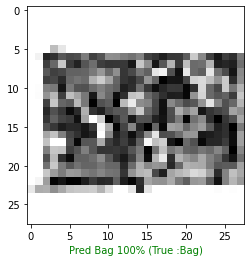

In [29]:
plot_random_image(
    model = model_4, 
    images = test_norm_data,
    classes = class_names,
    true_labels = test_labels
)

#✅ Analyasing the patterns learnt by our Model

In [ ]:
model_4.layers

In [31]:
# Extracting the layer
model_4.layers[1]

In [34]:
# Get the patterns of layer in network

weights, biases = model_4.layers[1].get_weights()

weights, weights.shape


(array([[ 0.750634  , -0.27313223, -0.82188416, -0.9127992 ],
        [ 0.2691706 , -0.46465552, -0.54879206, -0.06272288],
        [ 0.7295083 ,  0.52221894, -1.0784711 , -0.7401476 ],
        ...,
        [-0.3287382 ,  0.64647174, -0.31933352,  0.20277645],
        [-0.3444481 ,  0.71963656,  0.2134401 , -0.5514334 ],
        [ 0.19599307,  0.12751064, -0.16020948,  0.04352661]],
       dtype=float32), (784, 4))

In [35]:
biases, biases.shape

(array([ 0.12595144,  0.00746655, -0.33886567,  0.9060974 ], dtype=float32),
 (4,))

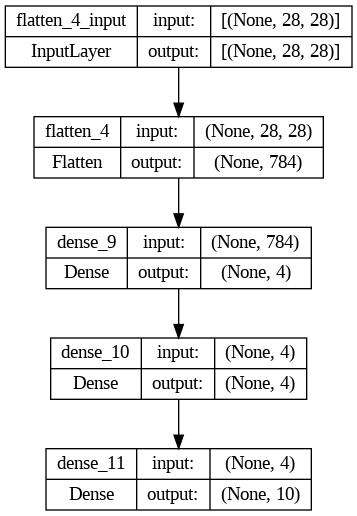

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes = True)